## Homework 02: Monte Carlo Basics
### PHYS420 — Intro to Computational Physics — Fall 2025  
### Hayden Dauphin

In [1]:
import matplotlib.pyplot as plt
import random 
import numpy as np
import scipy.stats as scistat
import statistics

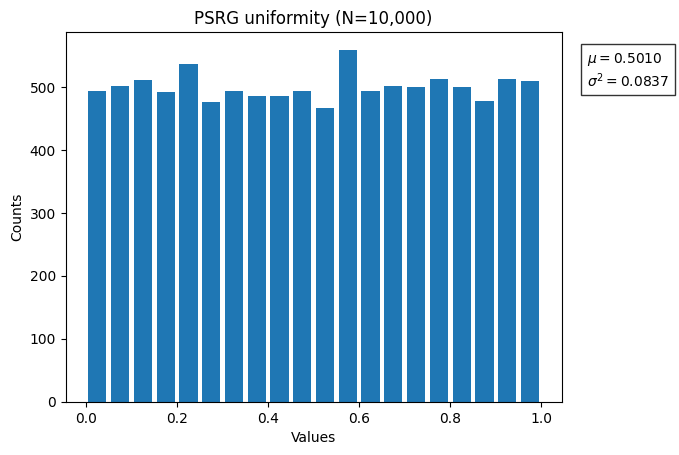

kth Moment Test:
k=2: Empirical moment = 0.3346, Theoretical moment = 0.3333, Percent error: 0.38%
k=3: Empirical moment = 0.2513, Theoretical moment = 0.2500, Percent error: 0.53%
k=4: Empirical moment = 0.2013, Theoretical moment = 0.2000, Percent error: 0.64%

Statistical Dependence (Accepted value = 0.25): 
C(1) = 0.251367, Percent error: 0.55%
C(2) = 0.251347, Percent error: 0.54%


In [39]:
''' 
Part A: Testing pseudo-random number generators 
'''
N = 10000 # number of values to generate
dataset = [np.random.random() for i in range(N)] # Uses numpy's PRNG, random——module uses PCG64 rather than Mersenne Twister
dataset = np.array(dataset)

# 1. Histogram and basic stats 
fig, ax = plt.subplots()
plt.rcParams['text.usetex'] = False

ax.hist(dataset, bins=20, rwidth=0.8) #Create a 20 bin histogram to sort the data in dataset
ax.set_title("PSRG uniformity (N=10,000)")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
#plt.show()

#compute mean and variance; print the values in a box beside the histogram 
mean = np.mean(dataset)
variance = statistics.variance(dataset)
ax.text(1.1, 500, 
        fr"$\mu={mean:.4f}$" 
        + "\n" 
        + fr"$\sigma^2={variance:.4f}$",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

plt.show()


# 2. Kth moment test


def percent_error(actual, accepted):
    """
    Function to calculate percent error
    Args: 
        actual = measured/actual value 
        accepted = accepted/theoretical value
    Returns: 
        absolute value of the percent error (float)
    """
    return(np.abs(((actual-accepted)/accepted)*100))

ks = [2,3,4] #k values to test

#compute moments for all k values 
print("kth Moment Test:")
for k in ks: 
    moment = np.mean(dataset**k)
    moment_th = 1/(k+1)
    error = percent_error(moment, moment_th)
    print (f"k={k}: Empirical moment = {moment:.4f}, Theoretical moment = {moment_th:.4f}, Percent error: {error:.2f}%")

# 3. Near-neighbor corelation test 

# Check statistical dependence between nearby values; function C(k)

def C(data, k): 
    N = len(data)
    return np.sum(data[:-k] * data[k:])/N 

lags = [1,2]
stat_dep = [C(dataset, k) for k in lags]

# Calculate percent errors; list the C(k) result and percent error for each lag value k 

errors = [percent_error(i, 0.25) for i in stat_dep]

print("\nStatistical Dependence (Accepted value = 0.25): ") 
for k, val, e in zip(lags, stat_dep, errors):
    print(f"C({k}) = {val:.6f}, Percent error: {e:.2f}%")

# 4. Autocorrelation test —— OPTIONAL 

# 5. Frequency (hisotgram) test —— OPTIONAL 

In [3]:
"""
Part B: Sampling from non-uniform distributions (OPTIONAL)
"""

'\nPart B: Sampling from non-uniform distributions (OPTIONAL)\n'

[np.float64(0.7218511925342489), np.float64(0.7436957621605976), np.float64(0.746019773722194), np.float64(0.7469294314098228), np.float64(0.7469283887224798)]
[np.float64(1.8566537323557075), np.float64(2.022200616329042), np.float64(1.9991669825285603), np.float64(1.9967189982864681), np.float64(2.0005511344125564)]
[np.float64(1.7671421876585651), np.float64(1.9925096594922207), np.float64(1.9883469488970107), np.float64(1.9868591783308784), np.float64(2.002705182481503)]


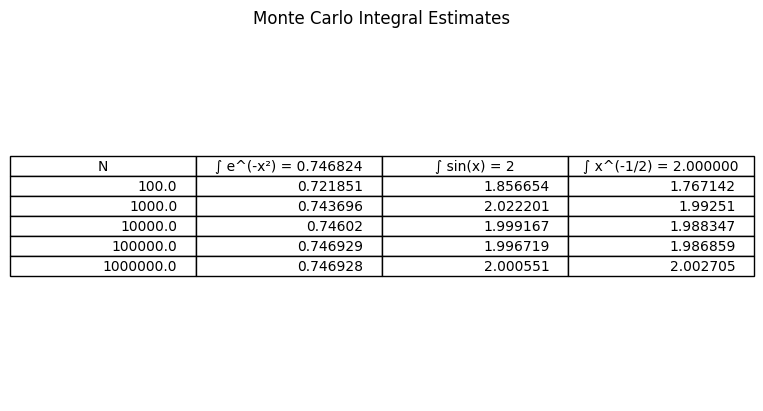

In [54]:
""" 
Part C: Monte Carlo integration (1D)

Use crude Monte Carlo to compute test integrals and error estimates for N = [100, 1000, 10000, 100000, 1000000]; compare with true value
Plot error vs N on log-log scale and check 1/sqrt(N) behavior (OPTIONAL)
"""


# list of trial ranges 
N = [100, 1000, 10000, 100000, 1000000]

def monte_carlo(func, a, b, N):
    """ 
    Monte Carlo definite integral estimation
    Args: 
        func: function to integrate
        a: lower bound
        b: upper bound
        N: number of trials 
    Returns:
        estimate: Monte Carlo estimation of the result
    """
    #generate random numbers 
    random_samples = np.random.uniform(a, b, N)
    values = func(random_samples)
    avg = np.mean(values)
    estimate = (b - a) * avg
    return (estimate)


#Test integrals 

def integral_one(x):
    return np.e**(-x**2)

def integral_two(x):
    return np.sin(x)

def integral_three(x):
    return x**(-0.5)

result1 = [monte_carlo(integral_one, 0, 1, n) for n in N]
print(result1)

result2 = [monte_carlo(integral_two, 0, np.pi, n) for n in N]
print(result2)

result3 = [monte_carlo(integral_three, 0, 1, n) for n in N]
print(result3)


cell_text = []
for i in range(len(N)):
    cell_text.append([N[i], result1[i], result2[i], result3[i]])

fig, ax = plt.subplots()
ax.axis("off")
table = ax.table(
    cellText=np.round(cell_text, 6),
    colLabels=["N", "∫ e^(-x²) = 0.746824", "∫ sin(x) = 2", "∫ x^(-1/2) = 2.000000"],
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.2)
plt.title("Monte Carlo Integral Estimates")
plt.show()
